# 특정 가구에 대한 피드백

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import datetime as dt
import random as ran
from sklearn.metrics.pairwise import euclidean_distances as euc

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from src.dbc import TimeDivisionKMeans
from src.dbc.utils import data_preprocessing, dimension_reduction, calc_contribution

In [3]:
# 1. load_excel
data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
df = data_preprocessing(xlsx)

# 3. dimension_reduction
df = dimension_reduction(df)

# 4. day clustering
copy_df = df.copy()

In [4]:
# 4. day clustering
df = copy_df[:24 * 31]
size = 3
tdKMeans = TimeDivisionKMeans(df, size=size)

df.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,0.341,0.121,0.245,0.009,0.085,0.154,0.161,0.311,0.358,0.177,...,0.372,0.181,0.322,0.374,0.571,0.453,0.161,0.127,0.259,0.364
2018-05-01 01:00:00,0.337,0.186,0.285,0.010,0.071,0.127,0.179,0.225,0.206,0.178,...,0.245,0.238,0.292,0.382,0.327,0.352,0.172,0.133,0.234,0.286
2018-05-01 02:00:00,0.324,0.214,0.487,0.009,0.061,0.139,0.182,0.221,0.150,0.152,...,0.245,0.250,0.287,0.320,0.359,0.366,0.242,0.219,0.197,0.368
2018-05-01 03:00:00,0.319,0.250,0.300,0.009,0.067,0.132,0.172,0.274,0.142,0.205,...,0.177,0.223,0.329,0.170,0.322,0.267,0.269,0.164,0.229,0.414
2018-05-01 04:00:00,0.235,0.199,0.107,0.009,0.047,0.131,0.153,0.255,0.139,0.169,...,0.129,0.171,0.301,0.168,0.351,0.255,0.170,0.132,0.198,0.318


In [ ]:
tdKMeans.init_setting()
hc, ci = tdKMeans.run()

hc.head()

In [ ]:
test = pd.DataFrame(df.values.reshape(-1, 3, 108).sum(axis=1),
                    columns=df.columns)
test.head()

In [ ]:
contribution_df = calc_contribution(hc, ci, test)

In [ ]:
# 실제(합산치 상에서의) 최소, 최대 사용량 가구
cols = df.columns

sum_df = (df.sum() * 1000).round() / 1000
min_h = cols[sum_df.argmin()]
max_h = cols[sum_df.argmax()]
print("실제 (합산치 상에서의) 최소, 최대 사용량 가구")
print("- 최소: {} ({}kwh) / 최대: {} ({}kwh)\n".format(
    min_h,
    sum_df[min_h],
    max_h,
    sum_df[max_h]
))

mean_cont_df = contribution_df.mean().round().astype("int")
_min_h = cols[mean_cont_df.argmin()]
_max_h = cols[mean_cont_df.argmax()]
print("기여도 최소, 최대 사용량 가구")
print("- 최소: {} ({}kwh) (기여도: {}%) / 최대: {} ({}kwh) (기여도: {}%)\n".format(
    _min_h,
    sum_df[min_h],
    mean_cont_df[_min_h],
    _max_h,
    sum_df[max_h],
    mean_cont_df[_max_h]
))
print("- 최소사용량 가구 기여도 , 최대사용량 가구 기여도 비교 {}배".format(round(mean_cont_df[_max_h] / mean_cont_df[_min_h])))

In [ ]:
contribution_df.index = df.index[::3]

contribution_df.head()

In [ ]:
mean_cont_map = contribution_df.mean().round().astype("int")

# Day

In [ ]:
DAY_ARR = ["월", "화", "수", "목", "금", "토", "일"]
day_np = [_ for _ in range(0,7)]

for _day in range(0, 7):
    _day_np = contribution_df.loc[contribution_df.index.weekday == _day].values
    day_np[_day] = _day_np.mean(axis=0).round()
    
day_np = np.array(day_np)

day_cont_map_df = pd.DataFrame(day_np, 
                               index=["월", "화", "수", "목", "금", "토", "일"],
                              columns=df.columns)

day_cont_map_df

In [ ]:
cols = day_cont_map_df.columns
mean_cont_map = day_cont_map_df.mean().round().astype("int")
sort_mean_cont_map = mean_cont_map.argsort()

sort_cols = cols[sort_mean_cont_map]
sort_cont = mean_cont_map[sort_mean_cont_map]

In [ ]:
x,y  = np.histogram(sort_cont,bins=9)

min_min_y = y[0]
min_max_y = y[3]
median_min_y = y[4]
median_max_y = y[6]
max_min_y = y[7]
max_max_y = y[9]

min_idxes = np.where((sort_cont >= min_min_y) & (sort_cont <= min_max_y))[0]
min_idx = min_idxes[
    ran.randrange(0, len(min_idxes))
]

min_cont = sort_cont[min_idx]
min_col = sort_cols[min_idx]
min_pat = df[min_col][df[min_col].index.weekday == 0].values.reshape(-1,24)

median_idxes = np.where((sort_cont >= median_min_y) & (sort_cont <= median_max_y))[0]
median_idx = median_idxes[
    ran.randrange(0, len(median_idxes))
]

median_cont = sort_cont[median_idx]
median_col = sort_cols[median_idx]
median_pat = df[median_col][df[median_col].index.weekday == 0].values.reshape(-1,24)

median_idxes = np.where((sort_cont >= median_min_y) & (sort_cont <= median_max_y))[0]
median_idx = median_idxes[
    ran.randrange(0, len(median_idxes))
]

median_cont = sort_cont[median_idx]
median_col = sort_cols[median_idx]
median_pat = df[median_col][df[median_col].index.weekday == 0].values.reshape(-1,24)



max_idxes = np.where((sort_cont >= max_min_y) & (sort_cont <= max_max_y))[0]
max_idx = max_idxes[
    ran.randrange(0, len(max_idxes))
]
max_cont = sort_cont[max_idx]
max_col = sort_cols[max_idx]

# 평균 사용자와 최소사용자 비교

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(32,4))

max_err_weekday = 0
max_err = 0 

A = median_col
B = min_col

A_day = day_cont_map_df[A]
B_day = day_cont_map_df[B]

for day,_m1 in enumerate(A_day):
    _m2 = B_day[day]
    
    _pat_1 = df[A][df[A].index.weekday == day].values.reshape(-1,24)
    _pat_2 = df[B][df[B].index.weekday == day].values.reshape(-1,24)

    for pat_idx, pat_1 in enumerate(_pat_1):
        pat_2 = _pat_2[pat_idx]
        ax[day].plot(pat_1, color='r', linewidth=0.2)
        ax[day].plot(pat_2, color='b', linewidth=0.2)

    ax[day].plot(_pat_1.mean(axis=0), color='r', linewidth=2)
    ax[day].plot(_pat_2.mean(axis=0), color='b', linewidth=2)
    
    err = _m1 - _m2
    if err > max_err:
        max_err_weekday = day
        max_err =err
    
print("가구 A의 사용량은 {}kWh이며, 가구 B의 사용량은 {}kWh 입니다.".format(
    df[A].sum().round(),
    df[B].sum().round()
))
print("가장 차이가 많이 나는 요일은 {}요일 입니다.".format(DAY_ARR[max_err_weekday]))
plt.show()

# 평균 사용자와 최대사용자 비교

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(32,4))

max_err_weekday = 0
max_err = 0 

A = max_col
B = median_col

A_day = day_cont_map_df[A]
B_day = day_cont_map_df[B]

for day,_m1 in enumerate(A_day):
    _m2 = B_day[day]
    
    _pat_1 = df[A][df[A].index.weekday == day].values.reshape(-1,24)
    _pat_2 = df[B][df[B].index.weekday == day].values.reshape(-1,24)

    for pat_idx, pat_1 in enumerate(_pat_1):
        pat_2 = _pat_2[pat_idx]
        ax[day].plot(pat_1, color='r', linewidth=0.2)
        ax[day].plot(pat_2, color='b', linewidth=0.2)

    ax[day].plot(_pat_1.mean(axis=0), color='r', linewidth=2)
    ax[day].plot(_pat_2.mean(axis=0), color='b', linewidth=2)
    
    err = _m1 - _m2
    if err > max_err:
        max_err_weekday = day
        max_err =err
    
print("가구 A의 사용량은 {}kWh이며, 가구 B의 사용량은 {}kWh 입니다.".format(
    df[max_col].sum().round(),
    df[median_col].sum().round()
))
print("가장 차이가 많이 나는 요일은 {}요일 입니다.".format(DAY_ARR[max_err_weekday]))
plt.show()

# Time

In [2406]:
time_np = [_ for _ in range(0,24,size)]

for _time in range(0, 24, size):
    _time_np = contribution_df.loc[contribution_df.index.time == dt.time(_time, 0)].values
    time_np[round(_time / size)] = _time_np.mean(axis=0).round()
    
time_np = np.array(time_np)
time_cont_map_df = pd.DataFrame(time_np, 
                               index=[_ for _ in range(0, 24,size)],
                              columns=df.columns)

time_cont_map_df

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
0,8.0,8.0,9.0,2.0,3.0,5.0,6.0,9.0,7.0,5.0,...,9.0,8.0,11.0,8.0,18.0,12.0,6.0,5.0,12.0,12.0
3,8.0,7.0,10.0,2.0,3.0,6.0,8.0,10.0,6.0,5.0,...,7.0,9.0,13.0,9.0,16.0,12.0,8.0,9.0,13.0,14.0
6,5.0,6.0,6.0,2.0,3.0,6.0,6.0,7.0,5.0,6.0,...,5.0,11.0,12.0,8.0,12.0,10.0,9.0,7.0,12.0,12.0
9,5.0,5.0,5.0,2.0,3.0,7.0,9.0,9.0,7.0,6.0,...,7.0,12.0,9.0,10.0,13.0,10.0,7.0,8.0,10.0,10.0
12,6.0,5.0,6.0,1.0,3.0,7.0,9.0,7.0,5.0,6.0,...,8.0,10.0,7.0,9.0,15.0,10.0,6.0,8.0,10.0,11.0
15,6.0,5.0,5.0,2.0,2.0,7.0,9.0,7.0,7.0,11.0,...,8.0,13.0,11.0,12.0,16.0,9.0,8.0,9.0,12.0,10.0
18,6.0,4.0,4.0,1.0,3.0,6.0,11.0,8.0,11.0,9.0,...,8.0,11.0,13.0,11.0,16.0,9.0,9.0,7.0,16.0,12.0
21,7.0,5.0,7.0,2.0,3.0,5.0,7.0,10.0,10.0,7.0,...,9.0,8.0,13.0,8.0,19.0,10.0,8.0,5.0,12.0,13.0


In [2408]:
cols = time_cont_map_df.columns
mean_cont_map = time_cont_map_df.mean().round().astype("int")
sort_mean_cont_map = mean_cont_map.argsort()

sort_cols = cols[sort_mean_cont_map]
sort_cont = mean_cont_map[sort_mean_cont_map]

In [2409]:
x,y  = np.histogram(sort_cont,bins=9)

min_min_y = y[0]
min_max_y = y[3]
median_min_y = y[4]
median_max_y = y[6]
max_min_y = y[7]
max_max_y = y[9]

min_idxes = np.where((sort_cont >= min_min_y) & (sort_cont <= min_max_y))[0]
min_idx = min_idxes[
    ran.randrange(0, len(min_idxes))
]

min_cont = sort_cont[min_idx]
min_col = sort_cols[min_idx]
min_pat = df[min_col][df[min_col].index.weekday == 0].values.reshape(-1,24)

median_idxes = np.where((sort_cont >= median_min_y) & (sort_cont <= median_max_y))[0]
median_idx = median_idxes[
    ran.randrange(0, len(median_idxes))
]

median_cont = sort_cont[median_idx]
median_col = sort_cols[median_idx]
median_pat = df[median_col][df[median_col].index.weekday == 0].values.reshape(-1,24)

median_idxes = np.where((sort_cont >= median_min_y) & (sort_cont <= median_max_y))[0]
median_idx = median_idxes[
    ran.randrange(0, len(median_idxes))
]

median_cont = sort_cont[median_idx]
median_col = sort_cols[median_idx]
median_pat = df[median_col][df[median_col].index.weekday == 0].values.reshape(-1,24)



max_idxes = np.where((sort_cont >= max_min_y) & (sort_cont <= max_max_y))[0]
max_idx = max_idxes[
    ran.randrange(0, len(max_idxes))
]
max_cont = sort_cont[max_idx]
max_col = sort_cols[max_idx]

0


ValueError: cannot reshape array of size 62 into shape (3)

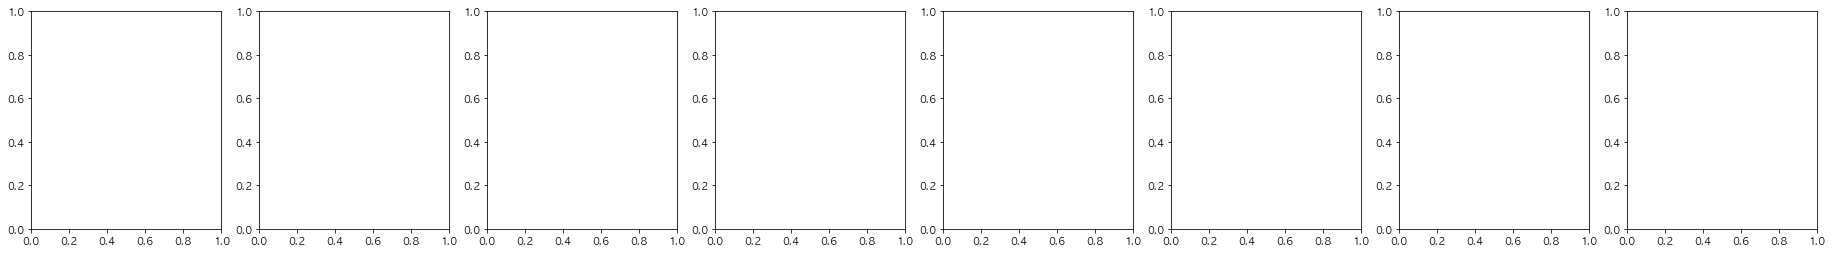

In [2428]:
fig, ax = plt.subplots(1, 8, figsize=(32,4))

max_err_weekday = 0
max_err = 0 

A = median_col
B = min_col

A_time = time_cont_map_df[A]
B_time = time_cont_map_df[B]

for time,_m1 in enumerate(A_time):
    _m2 = B_time[size * time]
    
    print(time)
    _pat_1 = df[A][(df[A].index.time >= dt.time(size * time, 0)) &
                   (df[A].index.time < dt.time(size * (time + 1), 0))].values
#     _pat_2 = df[B][df[B].index.time <= dt.time(size * (time + 1), 0)].values.reshape(-1,3)

    print(_pat_1.reshape(-1, 3))
    

#     for pat_idx, pat_1 in enumerate(_pat_1):
#         pat_2 = _pat_2[pat_idx]
#         ax[time].plot(pat_1, color='r', linewidth=0.2)
#         ax[time].plot(pat_2, color='b', linewidth=0.2)

#     ax[time].plot(_pat_1.mean(axis=0), color='r', linewidth=2)
#     ax[time].plot(_pat_2.mean(axis=0), color='b', linewidth=2)
    
#     err = _m1 - _m2
#     if err > max_err:
#         max_err_weekday = day
#         max_err =err
    
# print("가구 A의 사용량은 {}kWh이며, 가구 B의 사용량은 {}kWh 입니다.".format(
#     df[A].sum().round(),
#     df[B].sum().round()
# ))
# print("가장 차이가 많이 나는 시간대는 {}요일 입니다.".format(DAY_ARR[max_err_weekday]))
# plt.show()

In [2419]:
df

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,0.341,0.121,0.245,0.009,0.085,0.154,0.161,0.311,0.358,0.177,...,0.372,0.181,0.322,0.374,0.571,0.453,0.161,0.127,0.259,0.364
2018-05-01 01:00:00,0.337,0.186,0.285,0.010,0.071,0.127,0.179,0.225,0.206,0.178,...,0.245,0.238,0.292,0.382,0.327,0.352,0.172,0.133,0.234,0.286
2018-05-01 02:00:00,0.324,0.214,0.487,0.009,0.061,0.139,0.182,0.221,0.150,0.152,...,0.245,0.250,0.287,0.320,0.359,0.366,0.242,0.219,0.197,0.368
2018-05-01 03:00:00,0.319,0.250,0.300,0.009,0.067,0.132,0.172,0.274,0.142,0.205,...,0.177,0.223,0.329,0.170,0.322,0.267,0.269,0.164,0.229,0.414
2018-05-01 04:00:00,0.235,0.199,0.107,0.009,0.047,0.131,0.153,0.255,0.139,0.169,...,0.129,0.171,0.301,0.168,0.351,0.255,0.170,0.132,0.198,0.318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-31 19:00:00,0.182,0.188,0.072,0.009,0.188,0.335,0.507,0.261,0.353,0.512,...,0.512,0.334,0.462,0.283,0.666,0.459,0.383,0.169,0.401,0.654
2018-05-31 20:00:00,0.178,0.189,0.060,0.009,0.159,0.288,0.532,0.416,1.027,0.542,...,0.492,0.399,0.482,0.344,0.835,0.453,0.477,0.226,0.406,0.637
2018-05-31 21:00:00,0.215,0.183,0.058,0.009,0.103,0.288,0.455,0.492,0.317,0.482,...,0.370,0.315,0.695,0.460,0.773,0.502,0.432,0.259,0.362,0.553
2018-05-31 22:00:00,0.204,0.239,0.742,0.009,0.044,0.256,0.245,0.517,0.328,0.216,...,0.132,0.334,0.423,0.428,0.816,0.418,0.285,0.140,0.320,0.481
